# **Introduction** 
This project is about classification on chest xray image data. The data contains two kinds of images, normal chest xray and pneumonia chest xray data.
First I will do some pre-processing on the image data itself converting them into numeric format so neural networks models or logistic regression model can recognize.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


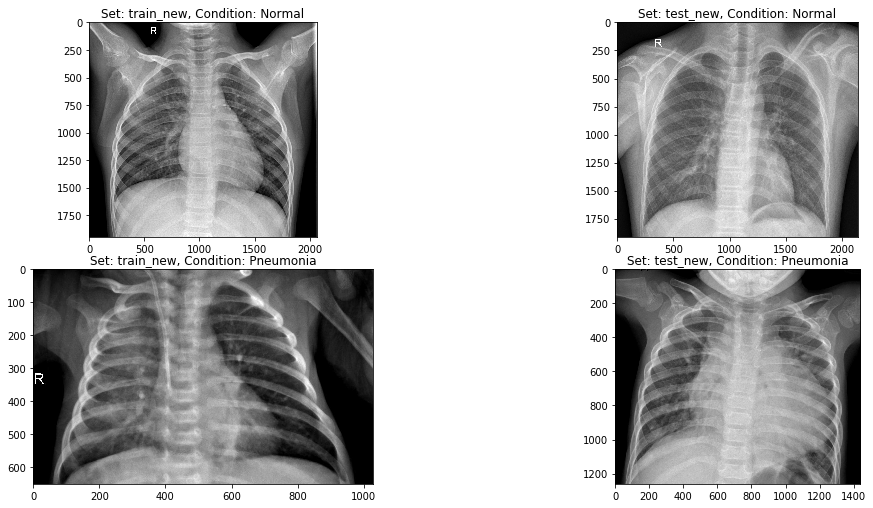

In [2]:
# show some normal chest xrays and pneumonia xrays
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


input_path = 'drive/My Drive/for Thinkful/xray_data/'

fig, ax = plt.subplots(2, 2, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train_new', 'test_new']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+2].imshow(plt.imread(set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]), cmap='gray')
    ax[i+2].set_title('Set: {}, Condition: Pneumonia'.format(_set))


Now start to pre-processing the image data first and define train data and test data

In [0]:
# Because of my laptop capacity, my training data only has 40 images, mixed in with normal xrays and pneumonia xrays
# same reason as my testing data has 40 images as well, mixed with normal xrays and pneumonia

In [83]:
from PIL import Image
from matplotlib import image
import glob
import numpy as np
image_list = []
for filename in glob.glob('drive/My Drive/for Thinkful/xray_data/train_new/NORMAL/*.jpeg'): 
    im=Image.open(filename)
    img_resized = im.resize((50,50)) # set the resize to 50*50 becasue of limitation on computer running capacity
    image_list.append(np.asarray(img_resized))
image_list[2].shape
    

(50, 50)

In [84]:
image_list[2]

array([[ 0, 14, 29, ..., 32, 31,  8],
       [ 0,  3, 26, ..., 26, 19,  3],
       [ 0,  0, 25, ..., 27, 14,  2],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [85]:
image_list

[array([[142, 122, 141, ...,  84,  81, 177],
        [187, 145, 119, ...,  90,  90, 242],
        [ 85, 185, 132, ..., 165, 142, 195],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[ 58,  90,  89, ..., 112,  92,  62],
        [ 50,  83,  88, ..., 109,  95,  58],
        [ 52,  78,  93, ..., 101,  93,  45],
        ...,
        [  0,   0,   0, ...,  45,   3,   0],
        [  0,   0,   0, ...,  60,  11,   0],
        [  0,   0,   0, ...,  66,  14,   0]], dtype=uint8),
 array([[ 0, 14, 29, ..., 32, 31,  8],
        [ 0,  3, 26, ..., 26, 19,  3],
        [ 0,  0, 25, ..., 27, 14,  2],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8),
 array([[ 20,  48,  71, ..., 138,  96,  94],
        [ 21,  16,  66, ..., 168, 100,  86],
        [ 25,  14,  61, ..., 106,  95,  85],
       

In [0]:
image_X=np.asarray(image_list)

In [87]:
image_X.shape

(20, 50, 50)

In [0]:
nsample,nx,ny=image_X.shape


In [0]:
image_X=image_X.reshape((nsample,nx*ny))

In [10]:
image_X.shape

(20, 2500)

In [0]:
y=np.zeros((10,), dtype=int)

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
type(y)

numpy.ndarray

In [14]:
# load pneumonia data 
from PIL import Image
from matplotlib import image
import glob
import numpy as np
image_pneumonia_list = []
for filename in glob.glob('drive/My Drive/for Thinkful/xray_data/train_new/PNEUMONIA/*.jpeg'): 
    print(filename)
    im=Image.open(filename)
    img_resized = im.resize((50,50))
    image_pneumonia_list.append(np.asarray(img_resized))
image_pneumonia_list[2].shape

drive/My Drive/for Thinkful/xray_data/train_new/PNEUMONIA/person10_bacteria_43.jpeg
drive/My Drive/for Thinkful/xray_data/train_new/PNEUMONIA/person12_bacteria_48.jpeg
drive/My Drive/for Thinkful/xray_data/train_new/PNEUMONIA/person16_bacteria_55.jpeg
drive/My Drive/for Thinkful/xray_data/train_new/PNEUMONIA/person20_bacteria_67.jpeg
drive/My Drive/for Thinkful/xray_data/train_new/PNEUMONIA/person1_bacteria_2.jpeg
drive/My Drive/for Thinkful/xray_data/train_new/PNEUMONIA/person36_bacteria_184.jpeg
drive/My Drive/for Thinkful/xray_data/train_new/PNEUMONIA/person36_bacteria_185.jpeg
drive/My Drive/for Thinkful/xray_data/train_new/PNEUMONIA/person37_bacteria_187.jpeg
drive/My Drive/for Thinkful/xray_data/train_new/PNEUMONIA/person37_bacteria_188.jpeg
drive/My Drive/for Thinkful/xray_data/train_new/PNEUMONIA/person37_bacteria_186.jpeg
drive/My Drive/for Thinkful/xray_data/train_new/PNEUMONIA/person4_bacteria_14.jpeg
drive/My Drive/for Thinkful/xray_data/train_new/PNEUMONIA/person94_virus_1

(50, 50)

In [15]:
image_pneumonia_list[3].shape

(50, 50)

In [16]:
image_pneumonia_list

[array([[ 0,  0, 13, ..., 30,  6, 10],
        [ 6, 14, 19, ...,  9, 13,  8],
        [15, 25, 24, ..., 15,  5,  5],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  7, ...,  0,  0,  0],
        [ 0,  0, 12, ...,  0,  0,  0]], dtype=uint8),
 array([[  0,   0,  13, ...,   0,   0, 131],
        [  0,  14,  39, ...,   9,   0, 124],
        [  2,  34,  66, ...,  41,  22, 129],
        ...,
        [  0,   0,  42, ...,   0,   0,  28],
        [  0,   0,  26, ...,   0,   0,  28],
        [  0,   0,  28, ...,   0,   0,  30]], dtype=uint8),
 array([[  0,  48,  72, ..., 103,  76,  33],
        [  0,  34,  64, ...,  94,  67,  33],
        [  0,  35,  67, ...,  83,  44,  41],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[  5,  27,  32, ..., 189, 192, 200],
        [167,  26,  36, ..., 197, 192, 207],
        [187,  33,  38, ..., 182, 202, 211],
       

In [17]:
image_pneumonia_list[3]

array([[  5,  27,  32, ..., 189, 192, 200],
       [167,  26,  36, ..., 197, 192, 207],
       [187,  33,  38, ..., 182, 202, 211],
       ...,
       [ 23,  23,  21, ...,  15,  15,  17],
       [ 24,  23,  23, ...,  17,  24,  16],
       [ 25,  22,  22, ...,  26,  17,  16]], dtype=uint8)

In [0]:
image_X1=np.asarray(image_pneumonia_list)
nsample,nx,ny=image_X1.shape
image_X1=image_X1.reshape((nsample,nx*ny))

In [19]:
image_X1

array([[  0,   0,  13, ...,   0,   0,   0],
       [  0,   0,  13, ...,   0,   0,  30],
       [  0,  48,  72, ...,   0,   0,   0],
       ...,
       [ 26,  14,   0, ..., 101,  65,  34],
       [ 44,  50,  55, ...,  27,  23,  26],
       [ 14,   5,  28, ...,   4,  10,  13]], dtype=uint8)

In [0]:
import pandas as pd
X=pd.DataFrame(data=image_X)

In [0]:
X['status']=0 # normal

In [0]:
X1=pd.DataFrame(data=image_X1)

In [0]:
X1['status']=1 # penumonia

In [24]:
X1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,status
0,0,0,13,7,7,14,8,8,1,17,36,63,46,66,86,92,105,93,122,152,113,59,87,127,140,119,112,108,112,127,231,168,60,70,61,52,47,54,52,56,...,144,171,175,181,180,161,168,157,192,180,176,191,194,212,185,153,160,182,184,186,180,166,173,165,170,157,153,160,168,165,154,126,113,89,126,83,0,0,0,1
1,0,0,13,36,53,56,53,44,29,20,0,0,0,0,0,0,62,86,110,123,117,146,180,160,118,116,135,153,184,149,130,119,113,91,53,0,0,0,0,0,...,203,210,192,198,203,198,201,197,212,211,206,212,206,206,210,199,208,195,199,201,198,193,194,177,163,147,148,177,151,151,167,167,53,0,0,0,0,0,30,1
2,0,48,72,76,97,103,110,129,140,144,152,153,132,133,145,205,220,183,165,143,157,160,175,177,157,169,168,167,168,158,135,148,143,146,204,165,140,135,132,138,...,202,206,216,231,220,214,221,215,215,218,214,213,226,236,230,228,217,220,212,216,213,223,214,216,212,215,221,219,202,187,185,167,157,179,131,54,0,0,0,1
3,5,27,32,49,57,57,46,45,75,91,107,125,123,163,144,168,167,158,150,159,140,147,146,149,146,110,115,125,142,115,101,132,125,131,104,79,74,82,86,84,...,144,140,149,160,163,167,174,170,168,172,170,169,166,167,175,175,171,187,175,166,168,167,165,163,160,159,157,158,141,120,105,87,48,201,172,8,26,17,16,1
4,15,39,39,55,73,74,76,70,67,65,67,77,59,67,71,74,81,85,86,97,102,113,141,158,154,121,135,139,137,152,129,114,100,96,80,77,66,66,56,47,...,188,193,196,199,196,195,200,203,199,193,194,190,208,204,193,201,206,204,193,186,191,189,179,183,185,176,182,183,186,195,200,201,189,185,162,180,65,6,14,1
5,43,61,83,114,121,121,117,128,108,100,97,135,131,136,113,116,126,134,156,168,152,157,155,164,167,178,158,152,161,155,163,168,157,149,139,134,125,112,105,82,...,184,189,187,192,197,193,188,192,198,203,199,198,194,202,198,197,190,187,190,184,187,188,188,189,186,190,187,176,163,155,144,135,116,142,122,66,34,10,13,1
6,53,58,76,93,112,119,109,94,97,80,84,103,107,73,73,162,159,161,174,182,198,184,178,155,176,173,183,185,149,122,128,157,165,186,150,119,117,112,127,125,...,173,177,181,177,181,182,180,190,193,203,198,208,210,221,205,200,218,220,217,190,184,193,194,201,198,186,182,177,170,167,157,157,152,156,134,121,85,10,0,1
7,115,207,233,141,149,154,149,144,143,143,142,168,169,154,163,182,194,204,179,172,165,176,182,203,198,189,190,204,193,190,187,194,184,200,188,174,177,190,189,172,...,196,202,200,198,211,200,207,211,204,202,212,206,206,203,218,198,200,199,199,183,202,190,171,164,168,176,176,162,179,188,179,189,184,193,107,12,18,21,22,1
8,15,10,48,50,65,69,70,72,70,69,63,55,51,49,51,51,63,71,74,109,131,144,165,175,181,178,182,193,195,192,188,205,185,188,183,178,188,175,174,197,...,195,195,196,195,195,196,197,195,196,201,206,200,203,202,200,196,195,197,197,197,202,201,200,198,199,194,194,198,198,180,182,186,139,58,9,20,24,26,28,1
9,62,64,61,62,86,78,55,60,71,80,57,55,61,60,62,66,74,84,79,81,111,107,99,111,124,109,111,136,122,125,108,103,87,49,49,41,79,66,54,47,...,133,142,145,147,153,149,158,169,165,169,167,181,170,173,168,179,175,178,171,170,173,171,169,161,155,156,147,140,142,134,119,134,128,90,143,52,36,3,7,1


In [0]:
total_X=pd.concat([X,X1],axis=0)

In [0]:
total_X=total_X.sample(frac=1)

In [0]:
y=total_X['status']

In [28]:
y

13    1
8     0
17    1
12    0
11    1
0     1
12    1
19    0
15    1
9     0
10    0
4     1
2     0
2     1
1     1
5     0
5     1
18    1
19    1
7     1
10    1
6     0
6     1
13    0
16    1
0     0
11    0
17    0
3     0
4     0
7     0
15    0
18    0
16    0
8     1
14    1
14    0
1     0
3     1
9     1
Name: status, dtype: int64

In [0]:
total_X= total_X.iloc[:, :-1]

In [30]:
total_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
13,10,9,29,39,44,45,41,38,29,22,5,6,5,4,29,52,72,90,108,116,127,148,167,142,141,137,137,147,145,118,111,103,90,73,87,63,18,2,6,7,...,188,192,192,192,194,192,195,198,189,196,190,193,201,202,201,200,202,194,183,184,181,188,188,189,186,185,192,191,193,190,190,188,185,191,168,179,122,58,5,5
8,12,47,66,68,136,117,122,151,86,98,89,78,102,130,164,144,220,200,198,235,229,212,228,214,218,222,218,239,243,228,225,220,199,130,137,140,107,85,102,91,...,165,166,186,188,195,204,194,192,194,195,191,190,208,207,200,195,216,201,228,218,194,192,203,190,193,200,203,193,180,168,160,153,160,143,141,107,32,0,0,0
17,26,14,0,50,49,64,73,82,92,115,164,171,183,176,187,170,175,180,187,190,187,196,211,205,193,195,197,199,173,158,135,53,82,106,9,29,17,12,4,18,...,188,189,186,191,190,189,187,197,191,196,189,187,186,191,195,192,190,194,192,190,182,188,189,186,189,193,192,191,190,168,145,131,141,138,149,151,131,101,65,34
12,0,0,0,0,0,0,0,0,0,0,14,41,53,75,70,100,106,136,122,130,137,123,130,137,117,104,93,102,88,79,71,53,32,0,3,46,22,34,40,49,...,163,172,180,184,188,184,194,200,194,210,202,204,209,209,214,210,220,207,210,201,172,176,182,173,168,159,158,140,126,147,138,142,120,152,173,133,97,109,116,11
11,0,13,49,72,76,104,128,125,127,114,118,124,126,94,98,62,79,126,188,185,192,212,174,187,183,186,177,198,189,165,95,100,81,92,86,144,115,117,102,118,...,150,163,162,168,173,184,184,195,199,178,171,171,172,194,203,192,201,202,211,177,166,165,169,181,185,174,166,145,145,130,126,122,148,149,128,54,112,73,0,0
0,0,0,13,7,7,14,8,8,1,17,36,63,46,66,86,92,105,93,122,152,113,59,87,127,140,119,112,108,112,127,231,168,60,70,61,52,47,54,52,56,...,156,144,171,175,181,180,161,168,157,192,180,176,191,194,212,185,153,160,182,184,186,180,166,173,165,170,157,153,160,168,165,154,126,113,89,126,83,0,0,0
12,0,0,5,35,58,76,96,95,100,137,163,155,136,145,127,135,130,125,129,168,194,173,168,161,164,162,170,168,167,166,180,186,166,192,162,124,139,143,134,136,...,184,186,186,192,193,190,195,185,191,196,188,203,201,212,215,184,200,182,168,162,176,178,166,193,190,192,175,168,157,156,145,146,165,167,84,31,0,0,0,0
19,40,70,104,108,106,82,87,88,79,141,132,126,155,165,189,211,234,205,235,211,242,232,234,248,241,219,200,177,158,124,148,151,105,113,114,110,138,110,110,91,...,171,178,185,187,184,186,189,197,195,192,217,202,160,149,191,192,173,186,181,183,197,169,175,180,187,182,183,173,187,176,175,165,160,140,130,113,63,17,0,1
15,18,22,12,0,33,37,46,51,45,47,41,59,46,56,113,86,95,128,135,136,131,137,132,140,109,98,95,100,111,122,91,62,64,60,61,45,43,91,67,62,...,151,157,161,167,167,168,170,170,172,168,160,161,164,171,171,180,181,175,172,172,165,168,167,162,152,146,135,156,153,147,135,126,100,86,60,3,14,16,26,30
9,9,3,15,15,44,0,49,111,125,96,100,118,166,156,168,156,163,144,147,153,141,137,142,144,198,198,182,172,166,132,136,121,20,0,0,2,19,30,39,37,...,158,156,160,166,173,174,168,174,170,181,178,176,166,180,183,181,196,175,167,170,149,157,152,166,161,158,152,145,159,153,146,162,138,161,131,137,84,33,0,0


In [0]:
new_totalX=total_X.values

In [32]:
new_totalX

array([[ 10,   9,  29, ...,  58,   5,   5],
       [ 12,  47,  66, ...,   0,   0,   0],
       [ 26,  14,   0, ..., 101,  65,  34],
       ...,
       [ 58,  90,  89, ...,  66,  14,   0],
       [  5,  27,  32, ...,  26,  17,  16],
       [ 62,  64,  61, ...,  36,   3,   7]], dtype=uint8)

In [33]:
new_totalX.shape

(40, 2500)

In [0]:
new_y=y.values

In [0]:
# pre-processing testing data just like what I did with train data 
# test data

In [36]:
image_list_test = []
for filename in glob.glob('drive/My Drive/for Thinkful/xray_data/test_new/NORMAL/*.jpeg'): 
    im=Image.open(filename)
    img_resized = im.resize((50,50))
    image_list_test.append(np.asarray(img_resized))
image_list_test[2].shape
    

(50, 50)

In [0]:
image_X_test=np.asarray(image_list_test)

In [0]:
image_X_test.shape

nsample,nx,ny=image_X_test.shape
image_X_test=image_X_test.reshape((nsample,nx*ny))

In [39]:
# load test data penimonia part data

image_pneumonia_list = []
for filename in glob.glob('drive/My Drive/for Thinkful/xray_data/test_new/PNEUMONIA/*.jpeg'): 
    print(filename)
    im=Image.open(filename)
    img_resized = im.resize((50,50))
    image_pneumonia_list.append(np.asarray(img_resized))
image_pneumonia_list[2].shape

drive/My Drive/for Thinkful/xray_data/test_new/PNEUMONIA/person108_bacteria_511.jpeg
drive/My Drive/for Thinkful/xray_data/test_new/PNEUMONIA/person109_bacteria_512.jpeg
drive/My Drive/for Thinkful/xray_data/test_new/PNEUMONIA/person109_bacteria_513.jpeg
drive/My Drive/for Thinkful/xray_data/test_new/PNEUMONIA/person109_bacteria_517.jpeg
drive/My Drive/for Thinkful/xray_data/test_new/PNEUMONIA/person109_bacteria_519.jpeg
drive/My Drive/for Thinkful/xray_data/test_new/PNEUMONIA/person1_virus_9.jpeg
drive/My Drive/for Thinkful/xray_data/test_new/PNEUMONIA/person1_virus_6.jpeg
drive/My Drive/for Thinkful/xray_data/test_new/PNEUMONIA/person1_virus_8.jpeg
drive/My Drive/for Thinkful/xray_data/test_new/PNEUMONIA/person1_virus_13.jpeg
drive/My Drive/for Thinkful/xray_data/test_new/PNEUMONIA/person1_virus_12.jpeg
drive/My Drive/for Thinkful/xray_data/test_new/PNEUMONIA/person1_virus_7.jpeg
drive/My Drive/for Thinkful/xray_data/test_new/PNEUMONIA/person1_virus_11.jpeg
drive/My Drive/for Thinkfu

(50, 50)

In [0]:
image_X1_p=np.asarray(image_pneumonia_list)
nsample,nx,ny=image_X1_p.shape
image_X1_p=image_X1_p.reshape((nsample,nx*ny))

In [0]:
X_test=pd.DataFrame(data=image_X_test)
X_test['status']=0 # normal
X1p=pd.DataFrame(data=image_X1_p)
X1p['status']=1 # penumonia

In [0]:
total_Xtest=pd.concat([X_test,X1p],axis=0)
total_Xtest=total_Xtest.sample(frac=1)
ytest=total_Xtest['status']

In [0]:
total_Xtest= total_Xtest.iloc[:, :-1]

In [0]:
# new_totalX=total_X.values
# new_y=y.values

In [0]:
X_train=new_totalX
y_train=new_y
X_test=total_Xtest
y_test=ytest

### MLP classifier model

In [0]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

In [59]:
mlp.fit(X_train,y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))


Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = 97444.47681279
Iteration 5, loss = 156937.64635161
Iteration 6, loss = 222545.76992649
Iteration 7, loss = 291365.05470266
Iteration 8, loss = 361217.61565262
Iteration 9, loss = 430496.13590298
Iteration 10, loss = 498039.78303753
Iteration 11, loss = 563035.26863870
Iteration 12, loss = 624938.11716377
Iteration 13, loss = 683410.16335400
Iteration 14, loss = 738270.06782297
Iteration 15, loss = 789454.26312559
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score: 0.500000


In [70]:
from sklearn.metrics import classification_report

ypred=np.asarray(ypred)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.49      0.95      0.64        20
           1       0.00      0.00      0.00        20

    accuracy                           0.48        40
   macro avg       0.24      0.47      0.32        40
weighted avg       0.24      0.47      0.32        40



### BernoulliRBM Classifier + Logistic and Logistic Regression on Raw Pixel Data

In [0]:
from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone

In [97]:
logistic = linear_model.LogisticRegression(solver='newton-cg', tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])


rbm.learning_rate = 0.12
rbm.n_iter = 30
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 250
logistic.C = 6000

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train, y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -324580.62, time = 0.06s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -656461.62, time = 0.07s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -988342.62, time = 0.08s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1320223.62, time = 0.08s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1652104.62, time = 0.07s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1983985.62, time = 0.07s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -2315866.62, time = 0.07s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -2647747.62, time = 0.08s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -2979628.62, time = 0.07s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -3311509.62, time = 0.08s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -3643390.62, time = 0.07s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -3975271.62, time = 0.07s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -4307152.62, time = 0.08s
[BernoulliRBM] Iteration 14, pseudo-l

Pipeline(memory=None,
         steps=[('rbm',
                 BernoulliRBM(batch_size=10, learning_rate=0.12,
                              n_components=250, n_iter=30, random_state=0,
                              verbose=True)),
                ('logistic',
                 LogisticRegression(C=6000, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='newton-cg', tol=1, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [95]:
X_train.shape

(40, 2500)

In [98]:
# Training the Logistic regression classifier directly on the pixel
raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 100.
raw_pixel_classifier.fit(X_train, y_train)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=1, verbose=0,
                   warm_start=False)

In [99]:
X_train

array([[ 10,   9,  29, ...,  58,   5,   5],
       [ 12,  47,  66, ...,   0,   0,   0],
       [ 26,  14,   0, ..., 101,  65,  34],
       ...,
       [ 58,  90,  89, ...,  66,  14,   0],
       [  5,  27,  32, ...,  26,  17,  16],
       [ 62,  64,  61, ...,  36,   3,   7]], dtype=uint8)

In [100]:
import matplotlib.pyplot as plt

y_pred = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(y_test, y_pred)))

y_pred = raw_pixel_classifier.predict(X_test)
print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(y_test, y_pred)))

print(len(rbm.components_))

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        20
           1       0.00      0.00      0.00        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        20
           1       0.51      1.00      0.68        20

    accuracy                           0.53        40
   macro avg       0.76      0.53      0.39        40
weighted avg       0.76      0.53      0.39        40


250


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


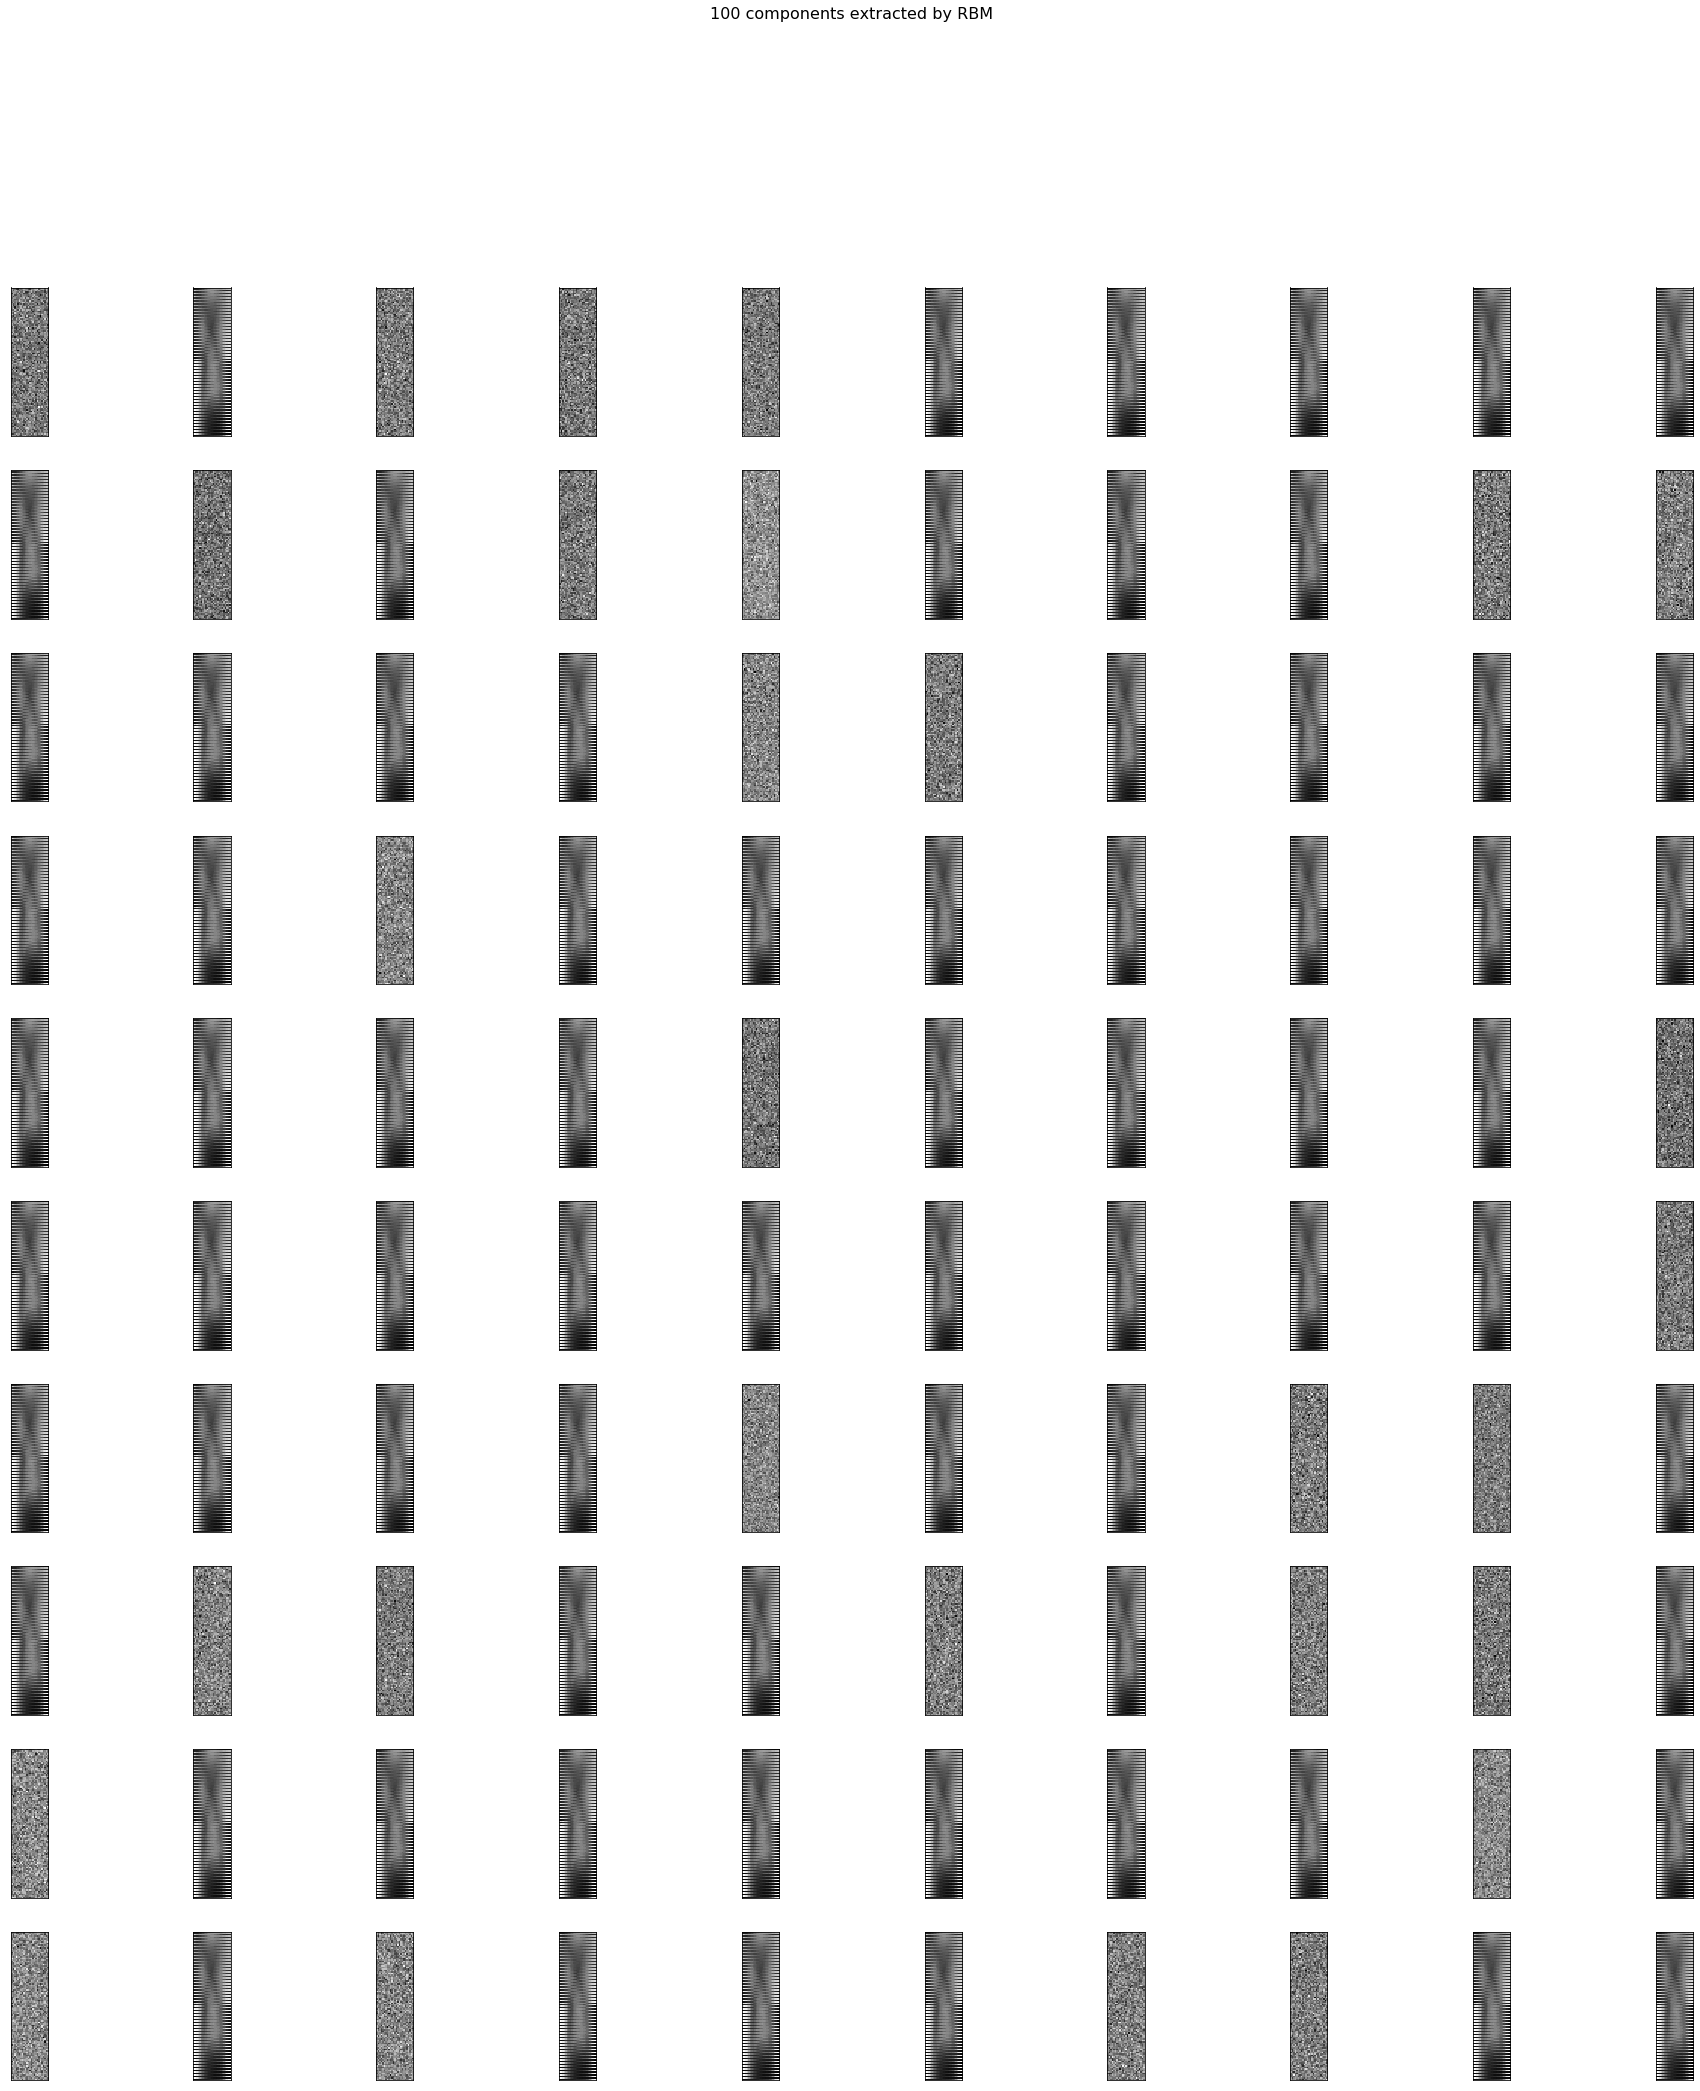

In [89]:
plt.figure(figsize=(30,30))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((100,25)),cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

In [91]:
y_pred = raw_pixel_classifier.predict(X_test)
y_pred=np.asarray(y_pred)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1]


Gradient Boosting model

In [0]:
from sklearn import preprocessing
Xtrain_new=preprocessing.normalize(X_train)
Xtest_new=preprocessing.normalize(X_test)

In [0]:
from sklearn import ensemble

In [107]:
params = {'learning_rate':0.05,
          'n_estimators': 30,
          'max_depth': 2,#decrease max_depth may reduce overfitting
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(Xtrain_new, y_train)

predict_train = clf.predict(Xtrain_new)
predict_test = clf.predict(Xtest_new)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.4
Percent Type II errors: 0.025


Apperently this ensemble gradient boosting learning model has over fitting issue.
So I will tune some parameters to see if there is improvement space for this model.

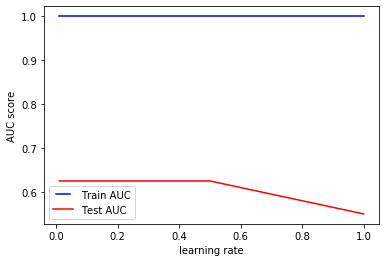

In [108]:
from sklearn.metrics import roc_curve, auc
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
   model = ensemble.GradientBoostingClassifier(learning_rate=eta)
   model.fit(Xtrain_new, y_train)
   train_pred = model.predict(Xtrain_new)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(Xtest_new)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

In [0]:
# so when tunning next parameters, use learning_rate =0.5

In [0]:
Xtrain_new=pd.DataFrame(Xtrain_new)

In [113]:
from sklearn.model_selection import GridSearchCV
predictors = Xtrain_new.columns
param_test1 = {'n_estimators':range(0,201,10)}
gsearch1 = GridSearchCV(estimator = ensemble.GradientBoostingClassifier(learning_rate=0.5, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
print(gsearch1)
print(gsearch1.best_params_)
print(gsearch1.best_score_)


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.5,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
    

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [0]:
# for next tunening step, using n_estimators=10

In [116]:
param_test2 = {'max_depth':range(3,16,2), 'min_samples_split':range(100,1001,200)}
gsearch2 = GridSearchCV(estimator = ensemble.GradientBoostingClassifier(learning_rate=0.5, n_estimators=10, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(Xtrain_new,y_train)
gsearch2.best_params_, gsearch2.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_depth': 3, 'min_samples_split': 100}, 0.5)

THe prediction score keep stay around 0.5, So I will stop the tunning here. I suspect the data itself has problem which caused the low accuracy rate

## Conclusion


Comparing the four models on classifying normal xrays and pneumonia xrays, the accuracy of four models are roughly around 50%, which is not promising. My guess of the reason to the low accuracy are due to low pixel resize and small number of training data. 

If you have any suggestion for this low accuracy issue, please let me know.